In [733]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as ss
import numpy.fft as fft

In [734]:
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
orig, Fs = sf.read("audio/klavir.wav")
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
xall = np.zeros((MIDITO+1, N))

samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = orig[samplefrom:sampleto]
    x = x - np.mean(x)
    xall[tone,:] = x
    samplefrom += Nwholetone
    sampleto += Nwholetone

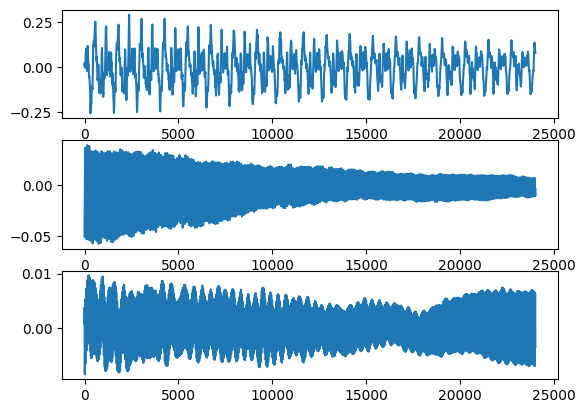

In [735]:
plt.figure()

plt.subplot(3,1,1)
a_orig = xall[27, :]
plt.plot(a_orig)

plt.subplot(3,1,2)
b_orig = xall[69, :]
plt.plot(b_orig)

plt.subplot(3,1,3)
c_orig = xall[84, :]
plt.plot(c_orig)

plt.show()

In [736]:
sf.write('audio/a_orig.wav', a_orig, Fs)
sf.write('audio/b_orig.wav', b_orig, Fs)
sf.write('audio/c_orig.wav', c_orig, Fs)

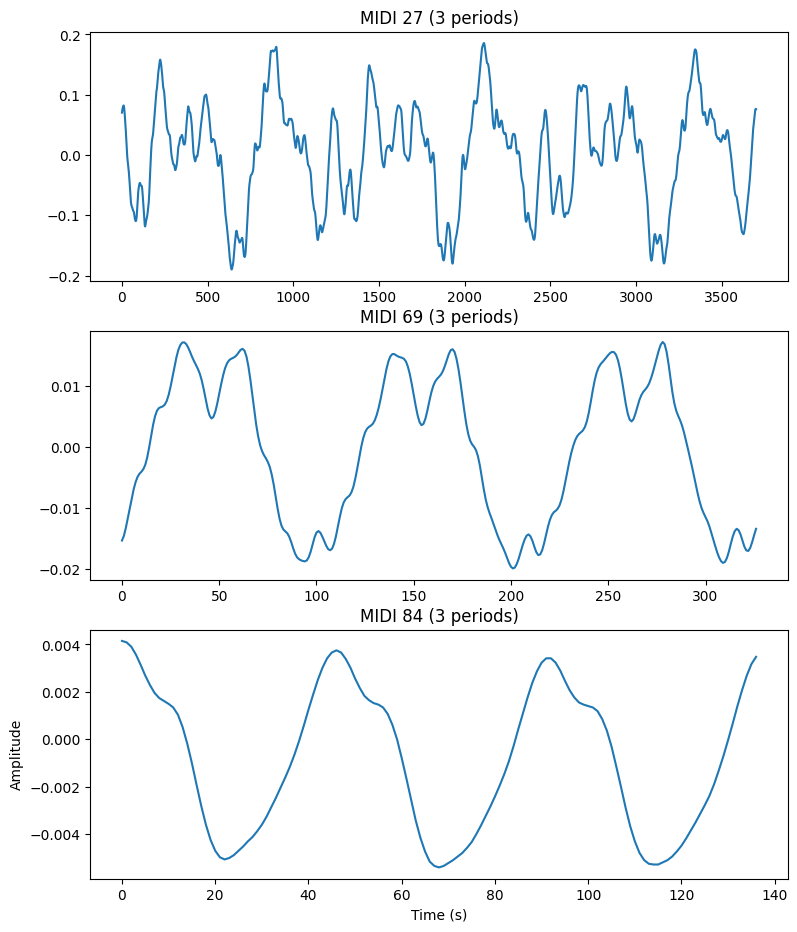

In [737]:
tones = [(27, 38.89), (69, 440.00), (84, 1046.50)]

# Create figure and axes
figure, axes = plt.subplots(nrows=3, figsize=(9,11))

#Loop through tones and plot them
for i in range(0, 3):
    # Calculate number of tones skipped from MIDI_FROM
    SKIP_TONES = tones[i][0] - MIDIFROM
    # Calculate start and end samples
    SEM_FROM = int(SKIP_TONES * Fs * WHOLETONE_SEC +
    SKIP_SEC * Fs * WHOLETONE_SEC)
    SEM_TO = int(SEM_FROM + Fs/tones[i][1]*3)
    # Set title and plot samples
    axes[i].set_title(f"MIDI {tones[i][0]} (3 periods)")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    axes[i].plot(orig[SEM_FROM:SEM_TO])

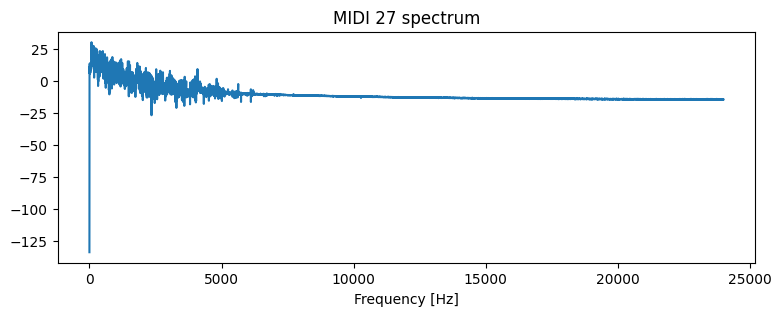

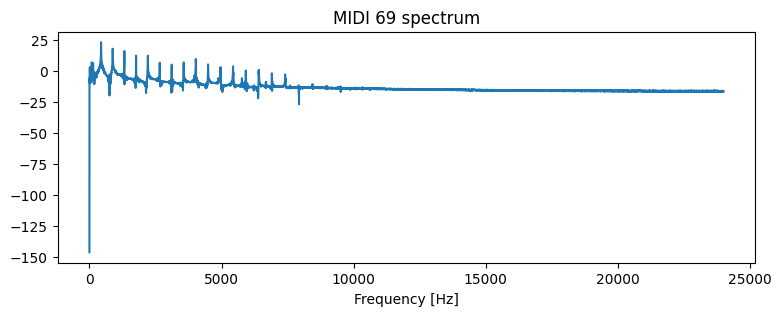

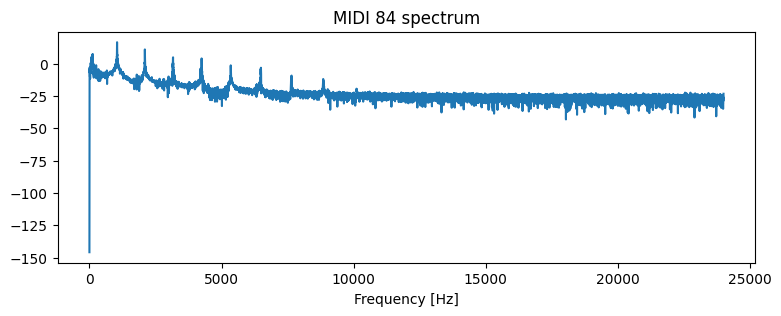

In [738]:
X = fft.rfft(a_orig)
mX = 10*np.log10(abs(X))
pX = np.angle(X)
f = np.arange(0, Fs/2 + Fs/N, Fs/N)

plt.figure(figsize=(9, 3))
plt.plot(f, mX)
plt.title('MIDI 27 spectrum')
plt.xlabel('Frequency [Hz]')
plt.show()

X = fft.rfft(b_orig)
mX = 10*np.log10(abs(X))
pX = np.angle(X)
f = np.arange(0, Fs/2 + Fs/N, Fs/N)

plt.figure(figsize=(9, 3))
plt.plot(f, mX)
plt.title('MIDI 69 spectrum')
plt.xlabel('Frequency [Hz]')
plt.show()

X = fft.rfft(c_orig)
mX = 10*np.log10(abs(X))
pX = np.angle(X)
f = np.arange(0, Fs/2 + Fs/N, Fs/N)

plt.figure(figsize=(9, 3))
plt.plot(f, mX)
plt.title('MIDI 84 spectrum')
plt.xlabel('Frequency [Hz]')
plt.show()

In [739]:
for tone in range(24, 102):
    x = xall[tone,:]
    autocorr = ss.correlate(x, x, mode='full')
    autocorr = autocorr[int(autocorr.size/2):]
    peaks, _ = ss.find_peaks(autocorr, distance=Fs/4)
    fundamental_frequency = Fs / peaks[0]
    print(f"Tone {tone} has fundamental frequency {fundamental_frequency:.2f} Hz")

for tone in range(102, 109):
    x = xall[tone,:]
    autocorr = ss.correlate(x, x, mode='full')
    autocorr = autocorr[int(autocorr.size/2):]
    peaks, _ = ss.find_peaks(autocorr)
    fundamental_frequency = Fs / peaks[0]
    print(f"Tone {tone} has fundamental frequency {fundamental_frequency:.2f} Hz")


Tone 24 has fundamental frequency 32.81 Hz
Tone 25 has fundamental frequency 34.76 Hz
Tone 26 has fundamental frequency 36.84 Hz
Tone 27 has fundamental frequency 39.02 Hz
Tone 28 has fundamental frequency 41.34 Hz
Tone 29 has fundamental frequency 43.80 Hz
Tone 30 has fundamental frequency 46.42 Hz
Tone 31 has fundamental frequency 49.18 Hz
Tone 32 has fundamental frequency 52.12 Hz
Tone 33 has fundamental frequency 55.17 Hz
Tone 34 has fundamental frequency 58.47 Hz
Tone 35 has fundamental frequency 61.94 Hz
Tone 36 has fundamental frequency 65.57 Hz
Tone 37 has fundamental frequency 69.46 Hz
Tone 38 has fundamental frequency 73.62 Hz
Tone 39 has fundamental frequency 77.92 Hz
Tone 40 has fundamental frequency 82.62 Hz
Tone 41 has fundamental frequency 87.75 Hz
Tone 42 has fundamental frequency 92.84 Hz
Tone 43 has fundamental frequency 98.36 Hz
Tone 44 has fundamental frequency 104.35 Hz
Tone 45 has fundamental frequency 110.60 Hz
Tone 46 has fundamental frequency 117.07 Hz
Tone 47 

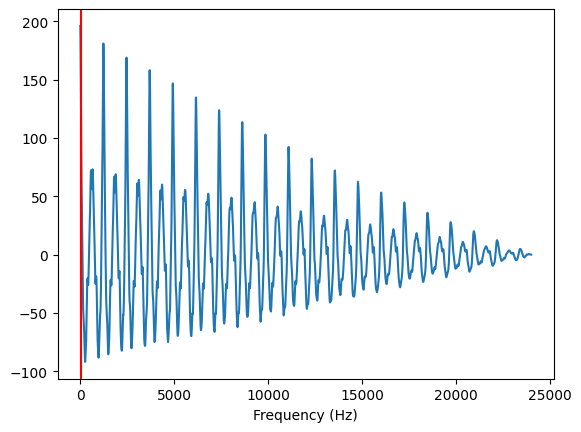

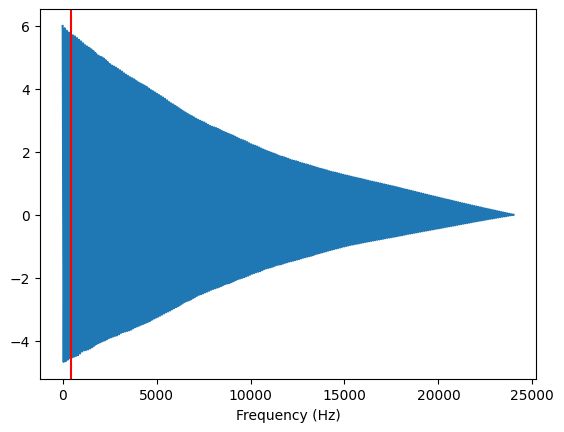

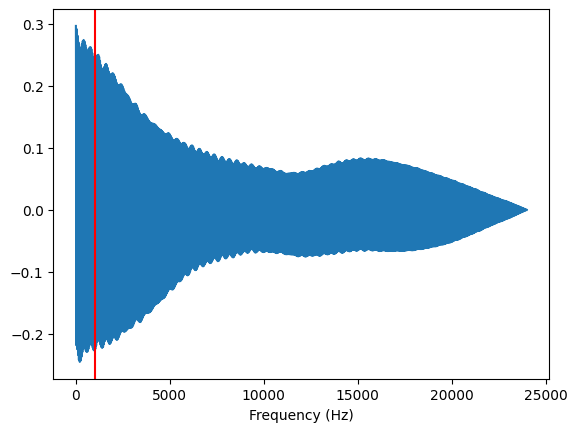

In [740]:
x = xall[27,:]

# Compute the autocorrelation of the signal
autocorr = ss.correlate(x, x, mode='full')
autocorr = autocorr[int(autocorr.size/2):]

# Find the peaks in the autocorrelation
peaks, _ = ss.find_peaks(autocorr, distance=Fs/4)

# Calculate the fundamental frequency based on the location of the first peak
fundamental_frequency = Fs / peaks[0]

# Plot the autocorrelation and mark the location of the fundamental frequency with a red cross
plt.plot(autocorr)

# Mark the fundamental frequency with a red cross
plt.plot(peaks[0], autocorr[peaks[0]])
plt.axvline(39.02, -10, 10, color='r')
# Label the x-axis with the frequency in Hz
plt.xlabel("Frequency (Hz)")
plt.show()

x = xall[69,:]

autocorr = ss.correlate(x, x, mode='full')
autocorr = autocorr[int(autocorr.size/2):]

peaks, _ = ss.find_peaks(autocorr, distance=Fs/4)

fundamental_frequency = Fs / peaks[0]

plt.plot(autocorr)

plt.plot(peaks[0], autocorr[peaks[0]])
plt.axvline(440.37, -10, 10, color='r')
plt.xlabel("Frequency (Hz)")
plt.show()

x = xall[84,:]

autocorr = ss.correlate(x, x, mode='full')
autocorr = autocorr[int(autocorr.size/2):]

peaks, _ = ss.find_peaks(autocorr, distance=Fs/4)

fundamental_frequency = Fs / peaks[0]

plt.plot(autocorr)

plt.plot(peaks[0], autocorr[peaks[0]])
plt.axvline(1043.48, -10, 10, color='r')
plt.xlabel("Frequency (Hz)")
plt.show()

In [741]:
for tone in range(24, 109):
    x = xall[tone,:]
    X = np.fft.fft(x)
    FREQRANGE = 100
    FREQPOINTS = 200
    kall = np.arange(0, int(N / 2) + 1)
    Xmag = np.abs(X[kall])
    Xphase = np.angle(X[kall])
    f = kall / N * Fs
    fmax = f[np.argmax(Xmag)]
    Xmax = np.max(Xmag)
    ffrom = fmax - FREQRANGE
    fto = fmax + FREQRANGE
    fsweep = np.linspace(fmax - FREQRANGE, fmax + FREQRANGE, FREQPOINTS)

    A = np.zeros([FREQPOINTS, N], dtype=complex)
    for k in np.arange(0, FREQPOINTS):
        A[k, :] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * np.arange(N))
    Xdtft = np.matmul(A, x.T)
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]

    print(f"Tone {tone} has true fundamental frequency {precisefmax:.2f} Hz")

Tone 24 has true fundamental frequency 65.50 Hz
Tone 25 has true fundamental frequency 69.50 Hz
Tone 26 has true fundamental frequency 73.50 Hz
Tone 27 has true fundamental frequency 77.50 Hz
Tone 28 has true fundamental frequency 82.50 Hz
Tone 29 has true fundamental frequency 87.50 Hz
Tone 30 has true fundamental frequency 92.50 Hz
Tone 31 has true fundamental frequency 97.50 Hz
Tone 32 has true fundamental frequency 103.50 Hz
Tone 33 has true fundamental frequency 109.50 Hz
Tone 34 has true fundamental frequency 116.50 Hz
Tone 35 has true fundamental frequency 123.50 Hz
Tone 36 has true fundamental frequency 130.50 Hz
Tone 37 has true fundamental frequency 138.50 Hz
Tone 38 has true fundamental frequency 220.50 Hz
Tone 39 has true fundamental frequency 233.50 Hz
Tone 40 has true fundamental frequency 247.50 Hz
Tone 41 has true fundamental frequency 87.50 Hz
Tone 42 has true fundamental frequency 92.50 Hz
Tone 43 has true fundamental frequency 98.50 Hz
Tone 44 has true fundamental fr